In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [5]:
batch_sizes = [2**i for i in range(8)]

In [6]:
time_means = []
time_std = []
memory_means = []
memory_std = []
for size in batch_sizes:
    times = np.load(f'timings/TangentConv_benchmark_1layer_pointmatching_faster_fixed_randNeg_correctData_biConv_16dim_epoch79_surfacegen_generation_times_{size}.npy')
    memory = np.load(f'timings/TangentConv_benchmark_1layer_pointmatching_faster_fixed_randNeg_correctData_biConv_16dim_epoch79_surfacegen_all_memory_usage_batch_{size}.npy')
    memory = memory*1e-6
    time_means.append(times.mean())
    memory_means.append(memory.mean())
    time_std.append(times.std())
    memory_std.append(memory.std())

FileNotFoundError: [Errno 2] No such file or directory: '../timings/TangentConv_benchmark_1layer_pointmatching_faster_fixed_randNeg_correctData_biConv_16dim_epoch79_surfacegen_generation_times_1.npy'

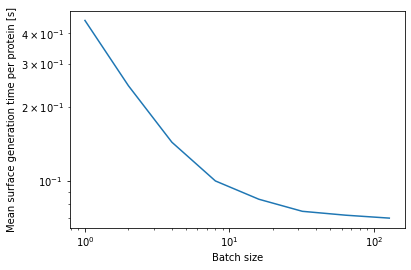

In [4]:
plt.plot(batch_sizes,time_means)
plt.xlabel('Batch size')
plt.ylabel('Mean surface generation time per protein [s]')
plt.xscale('log')
plt.yscale('log')

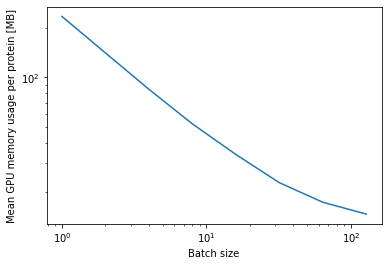

In [5]:
plt.plot(batch_sizes,memory_means)
plt.xlabel('Batch size')
plt.ylabel('Mean GPU memory usage per protein [MB]')
plt.xscale('log')
plt.yscale('log')

In [44]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=batch_sizes, y=time_means, name="Time", marker_size=12, marker_symbol='star', error_y=dict(type='data',array=time_std,visible=True)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=batch_sizes, y=memory_means, name="Memory", marker_symbol='square', marker_size=10,error_y=dict(type='data',array=memory_std,visible=True)),
    secondary_y=True,
)

fig.add_shape(type='line',
              x0=1,
              y0=6.11,
              x1=128,
              y1=6.11,
              line=dict(color='Blue',dash = 'dot'))

fig.update_xaxes(title_text="Batch size",tickvals = [1,2,4,6,8,10,20,40,60,80,100,200,400])
fig.update_yaxes(title_text="Mean surface generation time per protein [s]", secondary_y=False,color='blue')
fig.update_yaxes(title_text="Mean GPU memory usage per protein [MB]", secondary_y=True,color='red',tickvals = [10,20,40,60,80,100,200,400])


fig.update_xaxes(type="log")
fig.update_yaxes(type="log")

fig.update_yaxes(secondary_y=False,tickvals = [0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10])
fig.update_yaxes(secondary_y=False,range=[-1.5,1])



fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    font=dict(
        size=18,
    ))



fig.show()
fig.write_image("figures/surfgen_profile.pdf")

In [2]:
keys = ['surface', 'features', 'coordinates']
batch_size = 1
resolutions = [0.5,1.0,2.0,4.0]
sup_samplings = [40,20,10,5]
N = len(resolutions)

time_means = []
time_std = []
memory_means = []
memory_std = []
for i in range(N):
    times = np.load(f'../timings/step_profiling_{keys[0]}_times_batch_{batch_size}_res_{resolutions[i]}_B_{sup_samplings[i]}.npy')
    memory = np.load(f'../timings/step_profiling_{keys[0]}_memory_batch_{batch_size}_res_{resolutions[i]}_B_{sup_samplings[i]}.npy')
    memory = memory*1e-6
    time_means.append(times.mean())
    memory_means.append(memory.mean())
    time_std.append(times.std())
    memory_std.append(memory.std())

In [8]:
keys = ['surface', 'features', 'coordinates']
for key in keys:
    batch_size = 1
    resolutions = [0.5,1.0,2.0,4.0]
    sup_samplings = [40,20,10,5]
    N = len(resolutions)

    time_means = []
    time_std = []
    memory_means = []
    memory_std = []
    for i in range(N):
        times = np.load(f'../timings/step_profiling_{key}_times_batch_{batch_size}_res_{resolutions[i]}_B_{sup_samplings[i]}.npy')
        memory = np.load(f'../timings/step_profiling_{key}_memory_batch_{batch_size}_res_{resolutions[i]}_B_{sup_samplings[i]}.npy')
        memory = memory*1e-6
        time_means.append(times.mean())
        memory_means.append(memory.mean())
        time_std.append(times.std())
        memory_std.append(memory.std())


    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(
        go.Scatter(x=resolutions, y=time_means, name="Time", marker_size=12, marker_symbol='star', error_y=dict(type='data',array=time_std,visible=True)),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=resolutions, y=memory_means, name="Memory", marker_symbol='square', marker_size=10,error_y=dict(type='data',array=memory_std,visible=True)),
        secondary_y=True,
    )



    fig.update_xaxes(title_text="Resolution")
    fig.update_yaxes(title_text="Mean time per protein [s]", secondary_y=False,color='blue')
    fig.update_yaxes(title_text="Mean GPU memory usage per protein [MB]", secondary_y=True,color='red')



    #fig.update_yaxes(secondary_y=False,tickvals = [0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10])
    #fig.update_yaxes(secondary_y=False,range=[-1.5,1])



    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,
        font=dict(
            size=18,
        ))



    fig.show()
    fig.write_image(f'../figures/resolution_profiling_{key}.pdf')

In [22]:
keys = ['surface', 'features', 'coordinates']
for key in keys:
    batch_sizes = [1,2,4,8,16,32,64,128]
    resolution = 1.0
    sup_sampling = 20
    N = len(batch_sizes)

    time_means = []
    time_std = []
    memory_means = []
    memory_std = []
    for i in range(N):
        times = np.load(f'../timings/step_profiling_{key}_times_batch_{batch_sizes[i]}_res_{resolution}_B_{sup_sampling}.npy')
        memory = np.load(f'../timings/step_profiling_{key}_memory_batch_{batch_sizes[i]}_res_{resolution}_B_{sup_sampling}.npy')
        memory = memory*1e-6
        time_means.append(times.mean())
        memory_means.append(memory.mean())
        time_std.append(times.std())
        memory_std.append(memory.std())


    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(
        go.Scatter(x=batch_sizes, y=time_means, name="Time", marker_size=12, marker_symbol='star', error_y=dict(type='data',array=time_std,visible=True)),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=batch_sizes, y=memory_means, name="Memory", marker_symbol='square', marker_size=10,error_y=dict(type='data',array=memory_std,visible=True)),
        secondary_y=True,
    )

    if key=='surface':
        fig.add_shape(type='line',
                x0=1,
                y0=6.11,
                x1=128,
                y1=6.11,
                line=dict(color='Blue',dash = 'dot'))
    elif key=='features':
        fig.add_shape(type='line',
                x0=1,
                y0=19.69,
                x1=128,
                y1=19.69,
                line=dict(color='Blue',dash = 'dot'))
    elif key=='coordinates':
        fig.add_shape(type='line',
                x0=1,
                y0=50.65,
                x1=128,
                y1=50.65,
                line=dict(color='Blue',dash = 'dot'))



    fig.update_xaxes(title_text="Batch size (log)",tickvals = [1,2,4,6,8,10,20,40,60,80,100,200])
    fig.update_yaxes(title_text="Mean time per protein [s] (log)", secondary_y=False,color='blue')
    fig.update_yaxes(title_text="Mean GPU memory usage per protein [MB]", secondary_y=True,color='red')

    fig.update_xaxes(type="log")
    fig.update_yaxes(secondary_y=False,type="log")
    if key == 'surface':
        fig.update_yaxes(secondary_y=False,tickvals = [0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10])
        fig.update_yaxes(secondary_y=False,range=[-1.5,1])
    elif key=='features':
        fig.update_yaxes(secondary_y=False,tickvals = [0.005,0.01,0.02,0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20])
        fig.update_yaxes(secondary_y=False,range=[-2.5,1.5]) 
    elif key == 'coordinates':
        #fig.update_yaxes(secondary_y=False,tickvals = [4e-4,6e-4,8e-4,10e-4,2e-3,4e-3])
        fig.update_yaxes(secondary_y=False,tickvals = [0.0005,0.001,0.002,0.005,0.01,0.02,0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20,50])
        fig.update_yaxes(secondary_y=False,range=[-3.5,2]) 

    #fig.update_yaxes(secondary_y=False,range=[-1.5,1])



    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,
        font=dict(
            size=18,
        ))



    fig.show()
    fig.write_image(f'../figures/batchsize_profiling_{key}_izar.pdf')